# Computer Vision Based Coin Counter

## Import libraries 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 6] # set default figure size

## Load the Image and Display

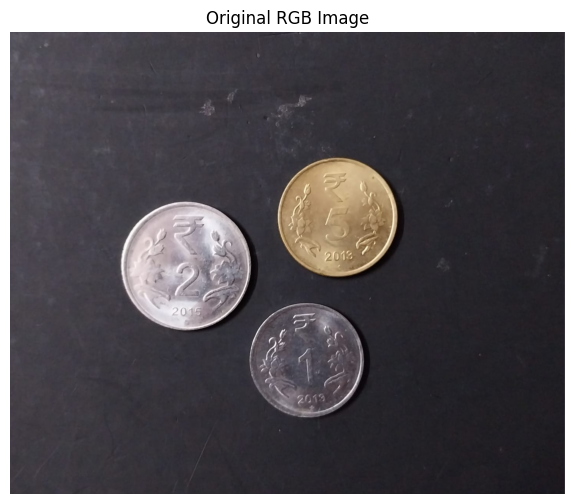

In [3]:
img = cv2.imread('inr-coins-dataset-2/125.jpeg') # image path
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR (OpenCV default) to RGB for matplotlib display
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis('off')
plt.show()

## Convert RGB to Grayscale

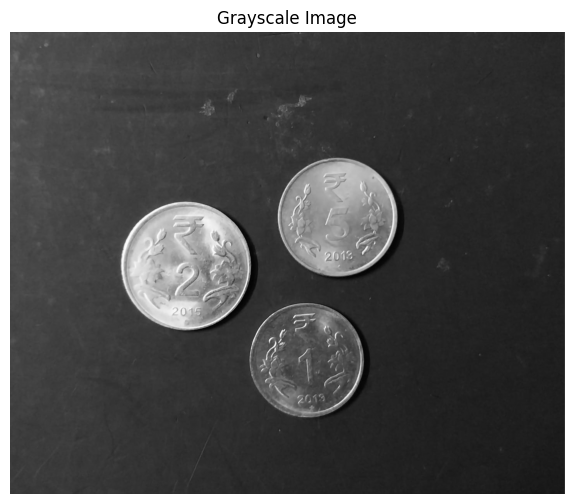

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

## Gaussian Blur to Reduce Noise

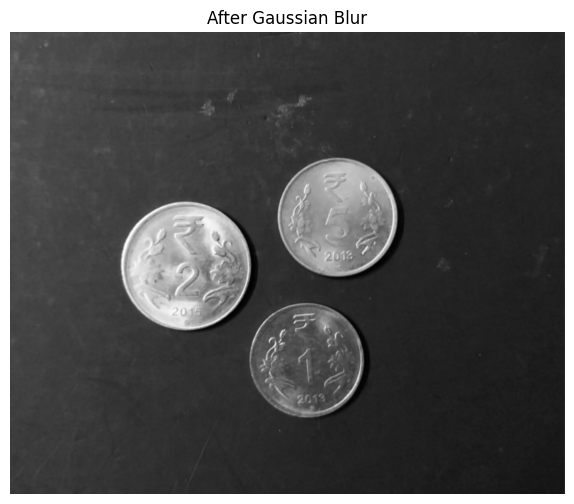

In [ ]:
blur = cv2.GaussianBlur(gray, (5, 5), 0) # (5,5) kernel works well for medium-size coins; adjust if needed to (3,3) or (7,7)

plt.imshow(blur, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')
plt.show()

## Adaptive Histogram Equalization (CLAHE)

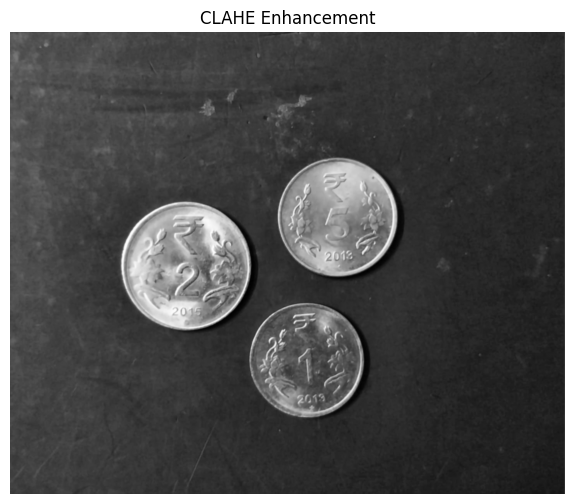

In [6]:
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
enhanced = clahe.apply(blur)

plt.imshow(enhanced, cmap='gray')
plt.title("CLAHE Enhancement")
plt.axis('off')
plt.show()

## Edge Detection

#### 1) Canny Edge Detection

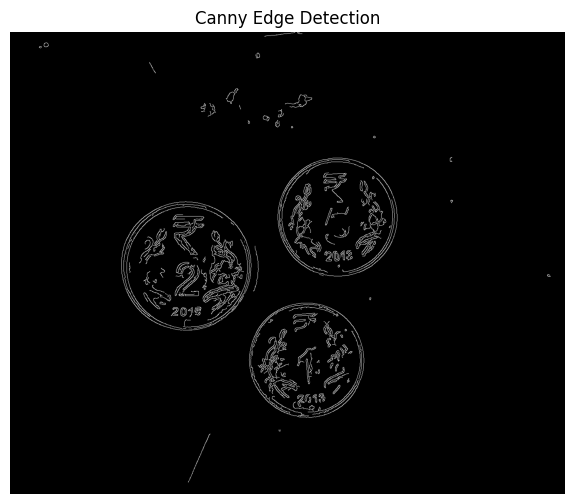

In [8]:
canny_edges = cv2.Canny(enhanced, threshold1=50, threshold2=150)

plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

#### 2) Sobel

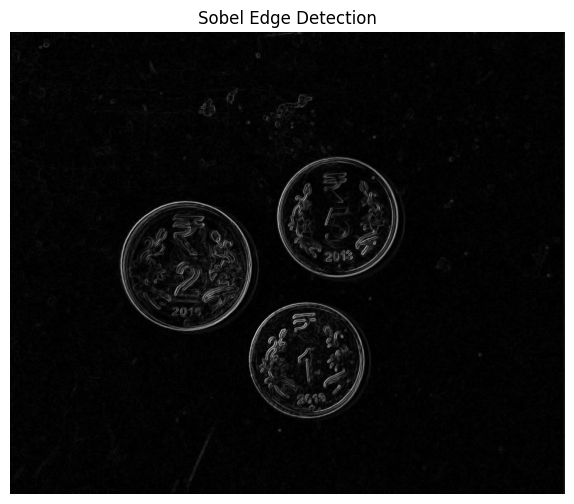

In [11]:
sobelx = cv2.Sobel(enhanced, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(enhanced, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

plt.imshow(sobel, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

#### 3) Scharr

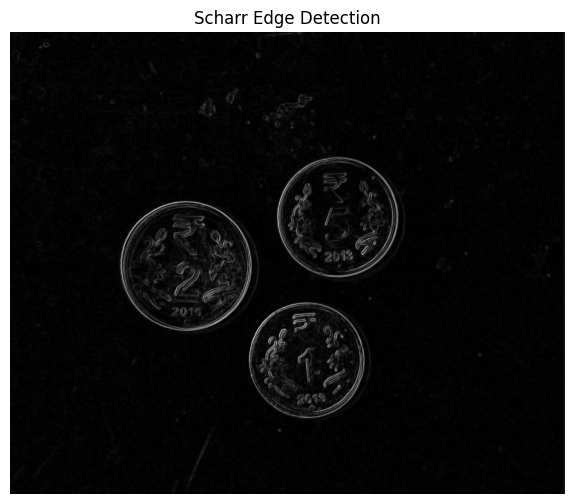

In [12]:
scharrx = cv2.Scharr(enhanced, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(enhanced, cv2.CV_64F, 0, 1)
scharr = cv2.magnitude(scharrx, scharry)

plt.imshow(scharr, cmap='gray')
plt.title("Scharr Edge Detection")
plt.axis('off')
plt.show()

#### 4) Prewitt

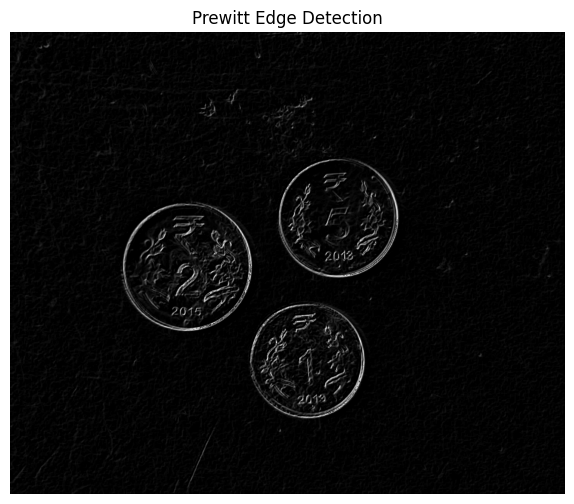

In [13]:
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

prewittx = cv2.filter2D(enhanced, -1, kernelx)
prewitty = cv2.filter2D(enhanced, -1, kernely)
prewitt = prewittx + prewitty

plt.imshow(prewitt, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()

#### 5) Laplacian of Gaussian (LoG)

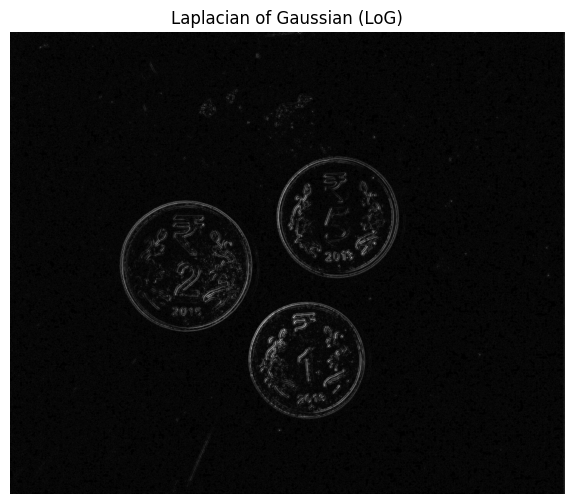

In [14]:
blurred = cv2.GaussianBlur(enhanced, (5,5), 0)
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

plt.imshow(np.absolute(laplacian), cmap='gray')
plt.title("Laplacian of Gaussian (LoG)")
plt.axis('off')
plt.show()

## Detect Coins using edge

#### 1) Hough Circle Transform

In [ ]:
circles = cv2.HoughCircles(prewitt, cv2.HOUGH_GRADIENT, dp=1.2, minDist=300,
                               param1=120, param2=40, minRadius=50, maxRadius=200)

# Check and draw circles
output = img_rgb.copy()
count = 0

if circles is not None:
    # Convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")

    # Loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # Draw the circle in the output image
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        # Draw a rectangle around the circle
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        count += 1

plt.imshow(output)
plt.title(f"Detected Coins: {count}")
plt.axis('off')
plt.show()